In [1007]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import time
warnings.filterwarnings('ignore')

In [1008]:
main_df = pd.read_csv('E:\LUU\Học tập\Marketing\Data Analysis\Statistics&ML\Final Project\churn_prediction.csv')

In [1009]:
df1 = main_df[main_df['Churn'] == 1].head(1000)
df2 = main_df[main_df['Churn'] == 0].head(1000)

data = pd.concat([df1,df2])

In [1010]:
#Seprate the identifier and target variable names as lists
custid = ['CustomerID']
target = ['Churn']

In [1011]:
#Separate categorical and numeric column names as lists
categorical = main_df.nunique()[main_df.nunique()<10].keys().tolist()
categorical.remove(target[0])
categorical.remove('HourSpendOnApp')
numerical = [col for col in main_df.columns
                    if col not in custid+target+categorical] + ['HourSpendOnApp']
numerical

['Tenure',
 'WarehouseToHome',
 'HourSpendOnApp',
 'NumberOfAddress',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount',
 'HourSpendOnApp']

DATA PROCESSING: HANDLE MISSING VALUE & DUPLICATE VALUE

In [1012]:
#Handle missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1948 entries, 0 to 1222
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   1948 non-null   int64  
 1   Tenure                       1788 non-null   float64
 2   PreferredLoginDevice         1948 non-null   object 
 3   CityTier                     1948 non-null   int64  
 4   WarehouseToHome              1793 non-null   float64
 5   PreferredPaymentMode         1948 non-null   object 
 6   Gender                       1948 non-null   object 
 7   HourSpendOnApp               1812 non-null   float64
 8   NumberOfDeviceRegistered     1948 non-null   int64  
 9   PreferedOrderCat             1948 non-null   object 
 10  SatisfactionScore            1948 non-null   int64  
 11  MaritalStatus                1948 non-null   object 
 12  NumberOfAddress              1948 non-null   int64  
 13  Complain          

In [1013]:
HourSpendOnApp_unique = data.HourSpendOnApp.unique()
np.sort(HourSpendOnApp_unique)

array([ 0.,  1.,  2.,  3.,  4., nan])

In [1014]:
    #Nullity DataFrame
data_nullity = data.isnull()
data_nullity.head()

,CustomerID,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Churn
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [1015]:
    #Total missing values at each column
data_nullity.sum()

CustomerID                       0
Tenure                         160
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                155
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 136
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear     43
CouponUsed                      79
OrderCount                      61
DaySinceLastOrder               84
CashbackAmount                   0
Churn                            0
dtype: int64

In [1016]:
    #Percentage of missingness
data_nullity.mean() * 100

CustomerID                     0.000000
Tenure                         8.213552
PreferredLoginDevice           0.000000
CityTier                       0.000000
WarehouseToHome                7.956879
PreferredPaymentMode           0.000000
Gender                         0.000000
HourSpendOnApp                 6.981520
NumberOfDeviceRegistered       0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
MaritalStatus                  0.000000
NumberOfAddress                0.000000
Complain                       0.000000
OrderAmountHikeFromlastYear    2.207392
CouponUsed                     4.055441
OrderCount                     3.131417
DaySinceLastOrder              4.312115
CashbackAmount                 0.000000
Churn                          0.000000
dtype: float64

In [1017]:
threshold = len(data) * 0.05
threshold

97.4

In [1018]:
cols_to_drop = data.columns[data.isna().sum() <= threshold]
cols_to_drop

Index(['CustomerID', 'PreferredLoginDevice', 'CityTier',
       'PreferredPaymentMode', 'Gender', 'NumberOfDeviceRegistered',
       'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus',
       'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount',
       'Churn'],
      dtype='object')

In [1019]:
data.dropna(subset = cols_to_drop, inplace = True)

In [1020]:
cols_with_missing_values = data.columns[data.isna().sum() > 0]
cols_with_missing_values

Index(['Tenure', 'WarehouseToHome', 'HourSpendOnApp'], dtype='object')

In [1021]:
    #Mode imputation
from sklearn.impute import SimpleImputer
mode_imputer = SimpleImputer(strategy = 'most_frequent')
data.iloc[:, :] = mode_imputer.fit_transform(data)
data.isna().sum()

CustomerID                     0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
Churn                          0
dtype: int64

In [1022]:
#Handle duplicate values
data.duplicated().any()

False

In [1023]:
data['PreferredPaymentMode'].replace('CC', 'Credit Card', inplace=True)
data['PreferredPaymentMode'].replace('Cash on Delivery', 'COD', inplace=True)
data['PreferedOrderCat'].replace('Mobile Phone', 'Mobile', inplace=True)

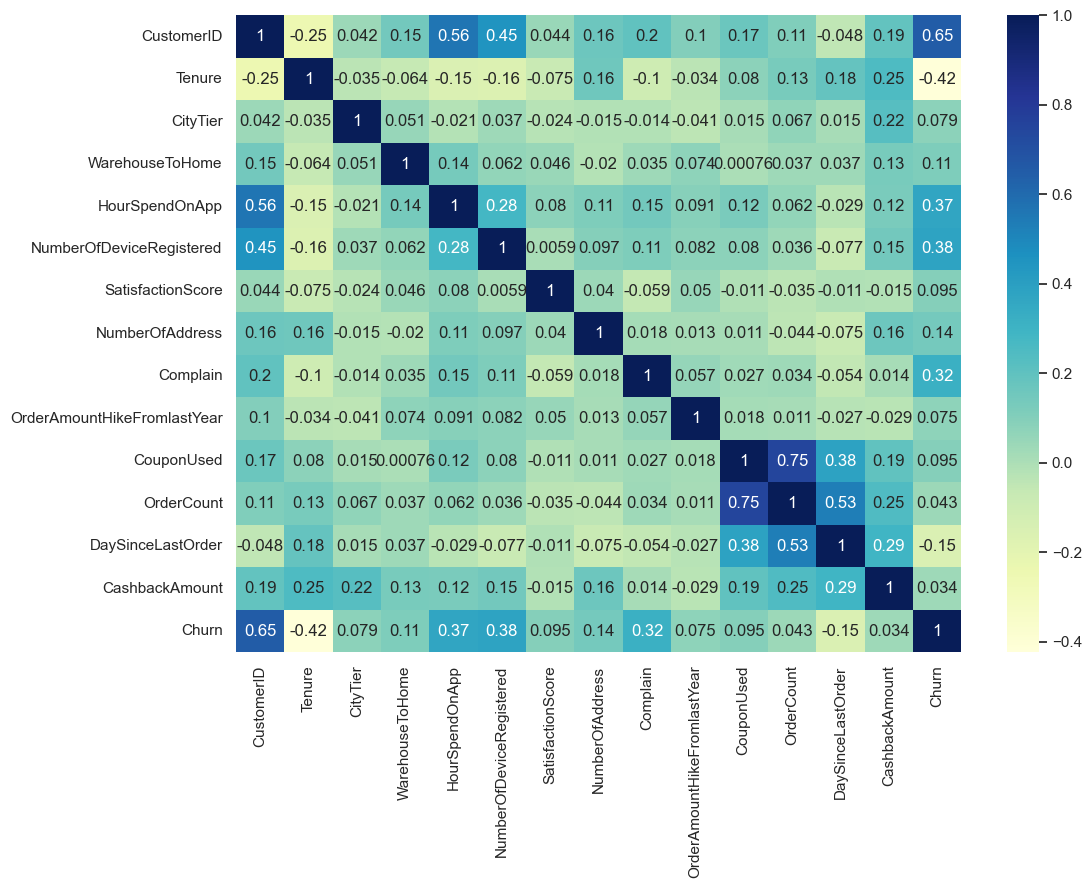

In [1024]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

FEATURE TRANSFORMING

In [1025]:
def count_percentage(df, column, target, count):
    
    # Create 2 dataframes of fraud and non-fraud
    churned = df[df[target]==1].groupby(column)[[count]].count().reset_index().sort_values(ascending=False, by = count)
    not_churned = df[df[target]==0].groupby(column)[[count]].count().reset_index().sort_values(ascending=False, by = count)
    
    #Merge 2 dataframe into one: 
    cate_df = churned.merge(not_churned, on = column , how = 'outer')
    cate_df = cate_df.fillna(0)
    cate_df.rename(columns = {count+'_x':'churned',count+'_y':'not_churned'}, inplace = True)
    
    #Caculate the percentage: 
    cate_df['%'] = cate_df['churned']/(cate_df['churned']+cate_df['not_churned'])
    
    return cate_df

In [1026]:
def normalize(data, list_columns):
    
    print('Start normalized columns')
    from sklearn.preprocessing import MinMaxScaler
    
    st = time.time()
    
    #Filter the data that contains list columns need to normalize:
    filter_df = data[list_columns]
    
    #Scale Feature: 
    scaler = MinMaxScaler()
    model=scaler.fit(filter_df)
    scaled_data=model.transform(filter_df)
    
    #Scaled data to dataframe: 
    scaled_data = pd.DataFrame(scaled_data, columns = list_columns)
    
    #Drop column in original data and merge with scaled data: 
    data.drop(columns = list_columns, inplace = True)
    # data = data.join(scaled_data)
    
    et = time.time()
    elaspe = (et-st)
    
    
    print('Normalize process done in:',elaspe,'s')
    return data.join(scaled_data)

In [1027]:
gender_fraud = count_percentage(data, 'Gender', 'Churn', 'CustomerID')
gender_fraud

,Gender,churned,not_churned,%
0,Male,534,495,0.518950
1,Female,320,332,0.490798


<Axes: xlabel='PreferedOrderCat', ylabel='%'>

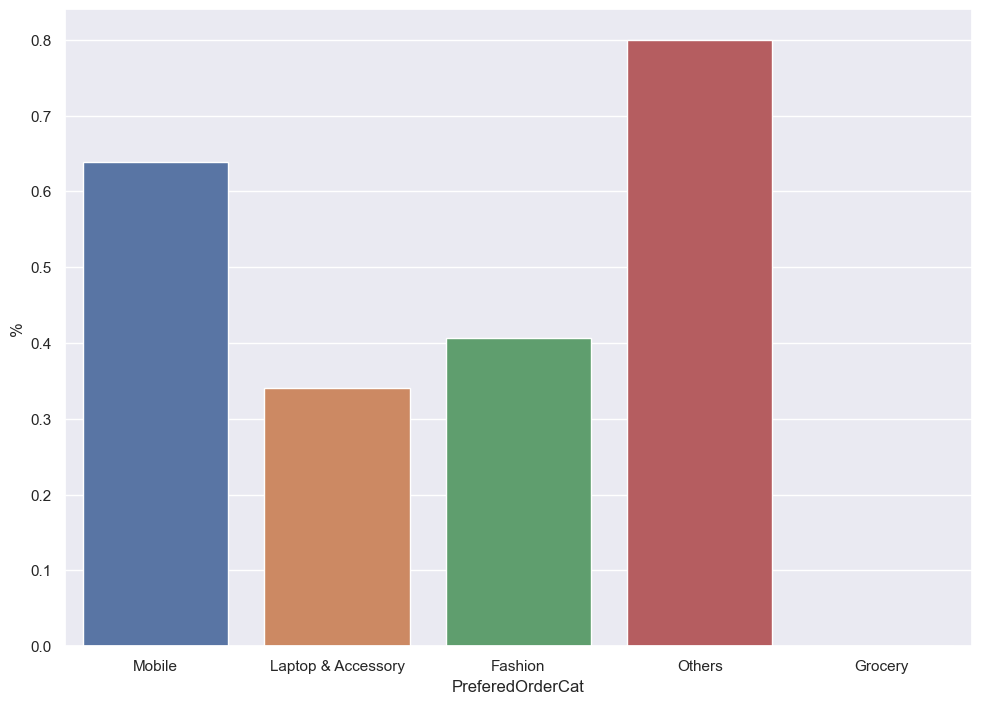

In [1028]:
ordercat_df = count_percentage(data, 'PreferedOrderCat', 'Churn', 'CustomerID')
sns.barplot(data = ordercat_df, x='PreferedOrderCat', y='%')

In [1029]:
complain_df = count_percentage(data, 'Complain', 'Churn', 'CustomerID')
complain_df

,Complain,churned,not_churned,%
0,1,456,186,0.710280
1,0,398,641,0.383061


<Axes: xlabel='NumberOfAddress', ylabel='%'>

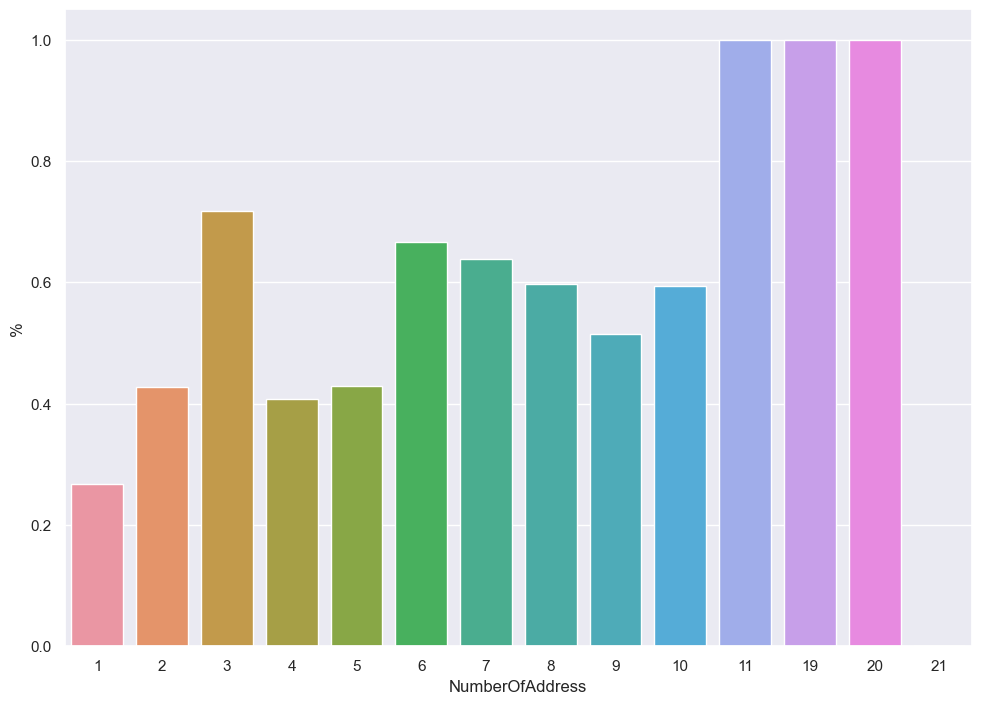

In [1034]:
number_of_address_df = count_percentage(data, 'NumberOfAddress', 'Churn', 'CustomerID')
sns.barplot(data = number_of_address_df, x='NumberOfAddress', y='%')

<Axes: xlabel='Tenure', ylabel='%'>

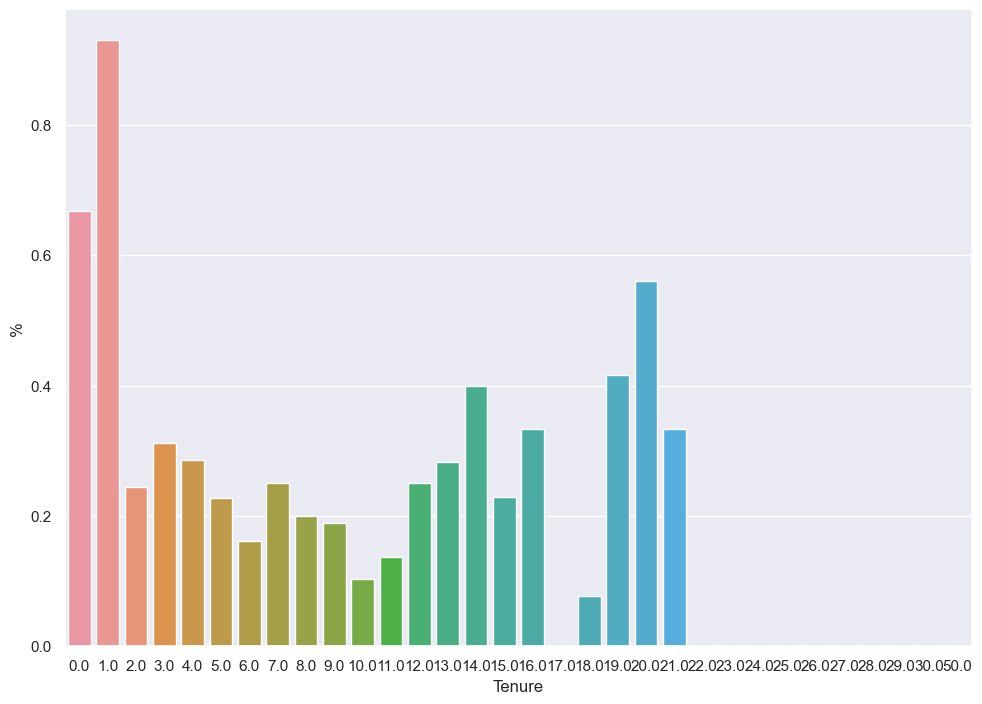

In [1033]:
number_of_address_df = count_percentage(data, 'Tenure', 'Churn', 'CustomerID')
sns.barplot(data = number_of_address_df, x='Tenure', y='%')

In [1177]:
df_model = data[['CityTier','PreferedOrderCat', 'Tenure', 'Complain', 'NumberOfAddress', 'Churn']]
df_model

,CityTier,PreferedOrderCat,Tenure,Complain,NumberOfAddress,Churn
0,3,Laptop & Accessory,4.0,1,9,1
1,1,Mobile,0.0,1,7,1
2,1,Mobile,0.0,1,6,1
3,3,Laptop & Accessory,0.0,0,8,1
4,1,Mobile,0.0,0,3,1
...,...,...,...,...,...,...
1218,1,Mobile,0.0,0,4,0
1219,1,Laptop & Accessory,10.0,1,6,0
1220,1,Laptop & Accessory,8.0,1,1,0
1221,1,Laptop & Accessory,18.0,0,1,0


In [1178]:
list_columns = ['PreferedOrderCat']
df_model = pd.get_dummies(df_model, columns = list_columns)
df_model

,CityTier,Tenure,Complain,NumberOfAddress,Churn,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Others
0,3,4.0,1,9,1,0,0,1,0,0
1,1,0.0,1,7,1,0,0,0,1,0
2,1,0.0,1,6,1,0,0,0,1,0
3,3,0.0,0,8,1,0,0,1,0,0
4,1,0.0,0,3,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1218,1,0.0,0,4,0,0,0,0,1,0
1219,1,10.0,1,6,0,0,0,1,0,0
1220,1,8.0,1,1,0,0,0,1,0,0
1221,1,18.0,0,1,0,0,0,1,0,0


In [1179]:
list_columns = df_model.columns.tolist()

from sklearn.preprocessing import MinMaxScaler

filter_df = df_model[list_columns]
scaler = MinMaxScaler()
model=scaler.fit(filter_df)
scaled_data=model.transform(filter_df)

df_model = pd.DataFrame(scaled_data, columns = list_columns)
df_model.head(10)

,CityTier,Tenure,Complain,NumberOfAddress,Churn,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Others
0,1.0,0.08,1.0,0.40,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.00,1.0,0.30,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.00,1.0,0.25,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.00,0.0,0.35,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.00,0.0,0.10,1.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.00,1.0,0.05,1.0,0.0,0.0,0.0,1.0,0.0
6,1.0,0.00,0.0,0.15,1.0,0.0,0.0,1.0,0.0,0.0
7,0.0,0.00,1.0,0.10,1.0,0.0,0.0,0.0,1.0,0.0
8,1.0,0.26,1.0,0.05,1.0,0.0,0.0,0.0,1.0,0.0
9,0.0,0.00,0.0,0.05,1.0,0.0,0.0,0.0,1.0,0.0


In [1180]:
from sklearn.model_selection import train_test_split
x=df_model.drop('Churn', axis = 1)
y=df_model[['Churn']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [1181]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score

# Initialize the KNN classifier
k = 3  
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the model
knn.fit(x_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

print('Balanced Accuracy:',balanced_accuracy)

Accuracy: 82.16%
Balanced Accuracy: 0.8215918240137132


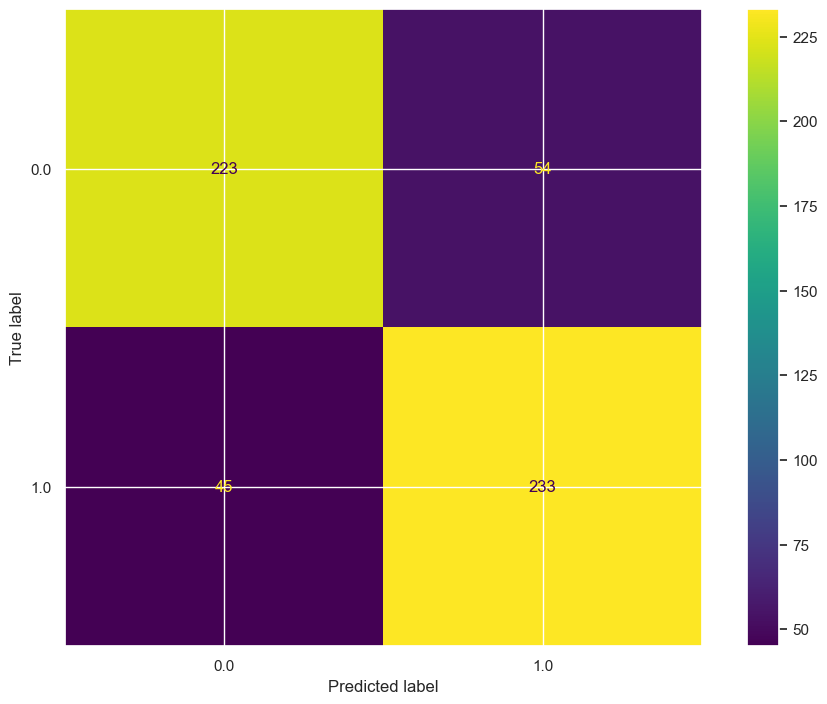

In [1182]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()

LOGISTIC REGRESSION

In [1183]:
from sklearn.linear_model import LogisticRegression

clf_logis = LogisticRegression(random_state = 0)
clf_logis.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [1184]:
y_pred_test = clf_logis.predict(x_test)
y_pred_train = clf_logis.predict(x_train)

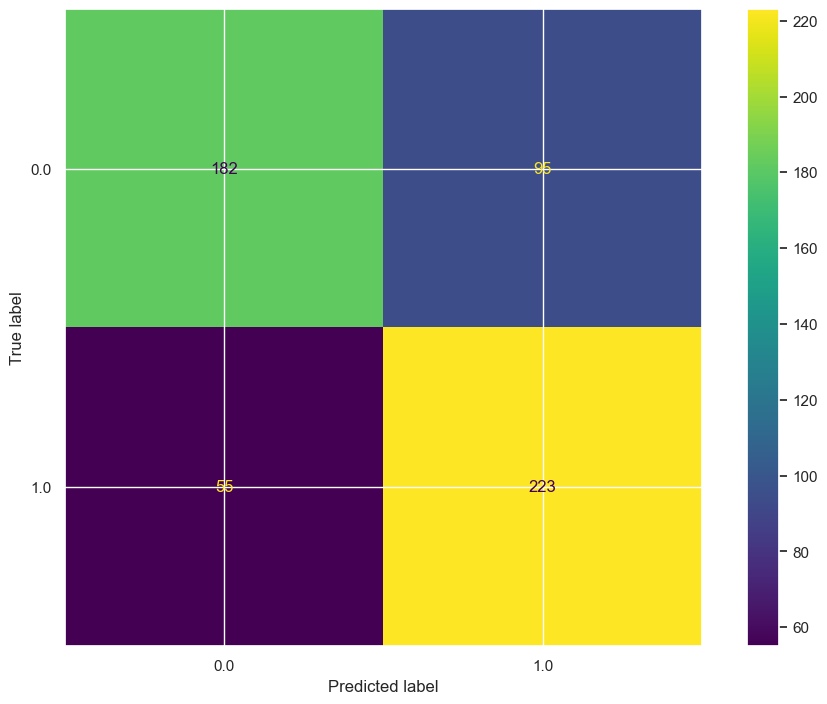

In [1185]:
cm = confusion_matrix(y_test, y_pred_test, labels=clf_logis.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_logis.classes_)
disp.plot()

In [1186]:
balanced_accuracy_train = balanced_accuracy_score(y_train, y_pred_train)
balanced_accuracy_test = balanced_accuracy_score(y_test, y_pred_test)
print(balanced_accuracy_train,balanced_accuracy_test)

0.7838162878787879 0.7295989922863153


In [1187]:
y_prob = clf_logis.predict_proba(x_test)[:, 1]

In [1188]:
df = pd.DataFrame(y_prob, columns=['prob'])
df['predicted_label'] = y_pred
df['true_label'] = y_test

In [1189]:
df

,prob,predicted_label,true_label
0,0.553350,0.0,NaN
1,0.819916,1.0,NaN
2,0.126889,0.0,NaN
3,0.810891,1.0,NaN
4,0.520636,0.0,NaN
...,...,...,...
550,0.419046,0.0,NaN
551,0.696456,1.0,1.0
552,0.190138,0.0,1.0
553,0.208660,1.0,NaN


1. What are the patterns/behavior of churned users? What are your suggestions to the company to reduce churned users.

Patterns: 
- The prefered ordered cart not in mobile, laptop & accessory, fashion, grocery
- Have complaints
- High number of address

Suggestions:
- Enhance Customer Support
- Multiple Delivery Addresses: Churned users with a high number of addresses might indicate a need for a flexible delivery system.
